# Modeling Classification

In [9]:
#import libraires and read in data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("/content/merged_health_census_clean (1).csv")

In [1]:
!pip install codecarbon
from codecarbon import EmissionsTracker
import logging
import sys


# Start the total tracker
total_tracker = EmissionsTracker(
   measure_power_secs=1,
   save_to_file=False,
   log_level="error"
)
total_tracker.start()

[codecarbon WARNING @ 00:13:45] Multiple instances of codecarbon are allowed to run at the same time.


In [ ]:
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Race_Total,Pct_White_Alone,Pct_Black_Alone,Pct_Asian_Alone,Majority_Race_Clean,Pct_Hispanic,Pct_Other
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,6037206032,5275,29.5,1556.0,15.5,...,309,4.823990,185,5133,58.620690,0.935126,16.637444,Hispanic,77.089421,23.806741
1,CA,Pasadena,656000,6037462001,0656000-06037462001,6037462001,3974,32.0,1272.0,11.6,...,367,5.752670,167,3893,48.548677,10.608785,9.915232,Hispanic,70.459800,30.927305
2,CA,Fullerton,628000,6059011504,0628000-06059011504,6059011504,5473,18.7,1023.0,4.6,...,873,6.832522,379,6024,61.636786,1.626826,23.090969,White,30.378486,13.645418
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,201,4.592980,123,3170,82.965300,9.589905,3.470032,White,7.350158,3.974763
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,594,9.886264,339,4030,73.374690,11.116625,5.831266,White,8.263027,9.677419


In [ ]:
df.columns

Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Tract_FIPS_full', 'Health_Pop', 'Obesity_Pct', 'Obesity_Count',
       'Diabetes_Pct', 'Diabetes_Count', 'HighChol_Pct', 'HighChol_Count',
       'HighBP_Pct', 'HighBP_Count', 'Stroke_Pct', 'Stroke_Count', 'Sleep_Pct',
       'Sleep_Count', 'MentalHealth_Pct', 'MentalHealth_Count', 'Asthma_Pct',
       'Asthma_Count', 'HeartDisease_Pct', 'HeartDisease_Count', 'Smoking_Pct',
       'Smoking_Count', 'State_FIPS', 'County_FIPS', 'Tract_FIPS',
       'State_Name', 'County_Name', 'Tract_Name', 'Median_Income',
       'Median_Age', 'Poverty_Pct', 'Poverty_Count', 'HS_Grad_Pct',
       'HS_Grad_Count', 'Bachelors_Pct', 'Bachelors_Count', 'Unemployed_Pct',
       'Unemployed_Count', 'Race_Total', 'Pct_White_Alone', 'Pct_Black_Alone',
       'Pct_Asian_Alone', 'Majority_Race_Clean', 'Pct_Hispanic', 'Pct_Other'],
      dtype='object')

### Modeling Setup

In [10]:
#create obesity categories
df["Obesity_Category"] = pd.qcut(df["Obesity_Pct"], q=3, labels=["Low", "Medium", "High"])

In [11]:
#define features and target
X = df[["Median_Income", "Median_Age", "Poverty_Pct",
        "HS_Grad_Pct", "Bachelors_Pct", "Unemployed_Pct",
        "Pct_White_Alone", "Pct_Black_Alone", "Pct_Asian_Alone",
        "Pct_Hispanic", "Pct_Other"]]
y = df["Obesity_Category"]

In [16]:
#test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80, stratify=y)

In [17]:
#scale features to the same units (z-score)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### kNN

### Logistic Regression

In [18]:
#MULTI LOGISTIC REGRESSION

#train logistic regression model and evaluate it
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# Train
logit_multi = LogisticRegression(
    multi_class="multinomial",      # softmax
    solver="lbfgs",                 # fast & energy-efficient for small/medium data
    max_iter=200,                   # usually converges well with scaled inputs
    n_jobs=None                     # keep CPU usage lean
)
logit_multi.fit(X_train_scaled, y_train)

# Predict
y_pred_multi = logit_multi.predict(X_test_scaled)
y_proba_multi = logit_multi.predict_proba(X_test_scaled)

# Evaluate
acc = accuracy_score(y_test, y_pred_multi)
f1_macro = f1_score(y_test, y_pred_multi, average="macro")
print(f"Multinomial Logistic Regression — Accuracy: {acc:.3f} | Macro-F1: {f1_macro:.3f}\n")

print("Classification report:\n", classification_report(y_test, y_pred_multi, digits=3))

print("Confusion matrix (rows=true, cols=pred):\n", pd.DataFrame(
    confusion_matrix(y_test, y_pred_multi, labels=logit_multi.classes_),
    index=[f"true_{c}" for c in logit_multi.classes_],
    columns=[f"pred_{c}" for c in logit_multi.classes_]
))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Multinomial Logistic Regression — Accuracy: 0.733 | Macro-F1: 0.732

Classification report:
               precision    recall  f1-score   support

        High      0.808     0.814     0.811      1799
         Low      0.782     0.776     0.779      1828
      Medium      0.607     0.607     0.607      1796

    accuracy                          0.733      5423
   macro avg      0.732     0.733     0.732      5423
weighted avg      0.733     0.733     0.733      5423

Confusion matrix (rows=true, cols=pred):
              pred_High  pred_Low  pred_Medium
true_High         1465        11          323
true_Low            28      1418          382
true_Medium        321       384         1091


**INTERPRETATION**

(Correct Predictions)

High: 1465 predicted as high that were actually high

Low: 1418 predicted as low that were actually low

Medium: 1091 predicted as medium that were actually medium

(705 total misclassifcations for Medium-Low and Medium-High, reducing accuracy for medium)

---

The model predicts the correct obesity category for 73.3% of cases. The model also performs roughly equally across low, medium, and high categories

---

**Based on Class/ Categorical Results**

HIGH: the high category performane extremely well, with strong identifcation of high obesity tracts

LOW: this was also a good model, whihc for the most part correctly classifies most low obesity areas

MEDIUM: Compareed to the other categories (Low and High) this model is notciable weaker and struggled to distinguish medium from the other two extremes.

*Overall the model does a decent job at distinguishing between LOW and HIGH but confuses MEDIUM (categorical overlap) potentially a binary logistic regression might be a better model*

---


In [19]:
# DO NOT NEED
# BINARY LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Recode target: High=1, else=0
y_train_high = (y_train == "High").astype(int)
y_test_high  = (y_test  == "High").astype(int)

logit_bin = LogisticRegression(
    solver="liblinear",   # efficient for binary problems & small data
    max_iter=200,
    class_weight="balanced"  # robust if class sizes drift
)
logit_bin.fit(X_train_scaled, y_train_high)

y_pred_bin  = logit_bin.predict(X_test_scaled)
y_prob_bin  = logit_bin.predict_proba(X_test_scaled)[:, 1]

acc_b  = accuracy_score(y_test_high, y_pred_bin)
f1_b   = f1_score(y_test_high, y_pred_bin)
auc_b  = roc_auc_score(y_test_high, y_prob_bin)

print(f"Binary Logistic Regression (High vs Not-High) — Acc: {acc_b:.3f} | F1: {f1_b:.3f} | ROC-AUC: {auc_b:.3f}\n")
print("Classification report:\n", classification_report(y_test_high, y_pred_bin, digits=3, target_names=["Not-High","High"]))

print("Confusion matrix (rows=true, cols=pred):\n", pd.DataFrame(
    confusion_matrix(y_test_high, y_pred_bin, labels=[0,1]),
    index=["true_Not-High","true_High"],
    columns=["pred_Not-High","pred_High"]
))

# Coefficients with feature names
feature_names = list(X.columns) if "X" in globals() and hasattr(X, "columns") else [f"f{i}" for i in range(X_train_scaled.shape[1])]
coef_s = pd.Series(logit_bin.coef_.ravel(), index=feature_names).sort_values(key=abs, ascending=False)
print("\nTop 15 features by absolute weight (positive => pushes toward 'High'):\n")
display(coef_s.head(15))


Binary Logistic Regression (High vs Not-High) — Acc: 0.865 | F1: 0.811 | ROC-AUC: 0.946

Classification report:
               precision    recall  f1-score   support

    Not-High      0.932     0.861     0.895      3624
        High      0.757     0.874     0.811      1799

    accuracy                          0.865      5423
   macro avg      0.845     0.868     0.853      5423
weighted avg      0.874     0.865     0.867      5423

Confusion matrix (rows=true, cols=pred):
                pred_Not-High  pred_High
true_Not-High           3119        505
true_High                226       1573

Top 15 features by absolute weight (positive => pushes toward 'High'):



,0
Bachelors_Pct,-1.765520
Pct_Asian_Alone,-1.438408
Poverty_Pct,0.983869
Pct_Black_Alone,0.883954
Pct_Other,-0.287477
Median_Age,-0.198016
Pct_White_Alone,-0.147923
Median_Income,0.137022
Unemployed_Pct,-0.106082
HS_Grad_Pct,0.100214


The model correctly classifies about 86.5% of all tracts, an the performance for both classes is balanced and can clearly sepreate High from Not High obesity areas. (Based on accuracy, F1 balance, and ROC-AUC discriminative power)

COEFFICENT TABLE INTERPREATTAION: postive is more likely "High Obesity"; Negative is more likely "Not-High"


*Education and Ethnincty being bigger drivers?*

In [20]:
#DO NOT NEED
# --- Feature Importance (absolute coefficient magnitude) ---
coef_s = pd.Series(logit_bin.coef_.ravel(), index=feature_names)
coef_sorted = coef_s.sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=coef_sorted.head(10), y=coef_sorted.head(10).index, palette="coolwarm")
plt.title("Top 10 Feature Importances — Logistic Regression", fontsize=13)
plt.xlabel("Coefficient Value (positive ⇒ pushes toward High obesity)", fontsize=11)
plt.ylabel("Feature", fontsize=11)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

I don't know if we want to use these its just reiterating the code output but visualizing it. But the coefficent value bar plot is interesting.

**HYPERPARAMETERS**

In [21]:
#Multinomial Logisitic Regression
logit_multi = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    C=1.0,          # Inverse regularization strength (default)
    penalty="l2",   # L2 regularization prevents overfitting
    max_iter=200,   # Enough for convergence
    random_state=80
)


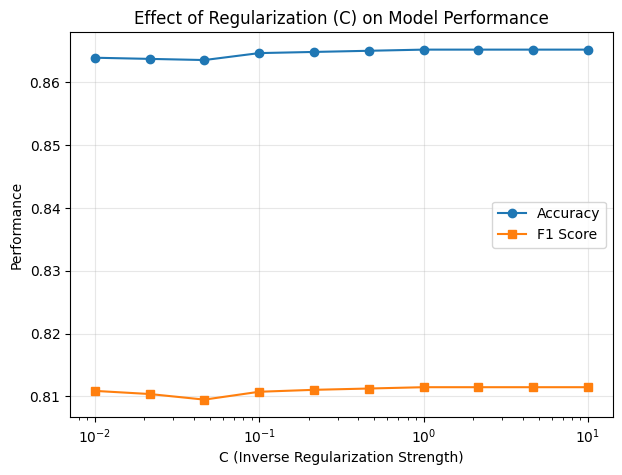

In [22]:
#DO NOT NEED
# BINARY VISUAL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Range of C values (smaller C = stronger regularization)
C_values = np.logspace(-2, 1, 10)  # [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
acc_scores, f1_scores = [], []

for C in C_values:
    temp_model = LogisticRegression(
        solver="liblinear",  # or "lbfgs" for multinomial
        penalty="l2",
        C=C,
        class_weight="balanced",
        max_iter=200,
        random_state=80
    )
    temp_model.fit(X_train_scaled, y_train_high)
    y_pred = temp_model.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test_high, y_pred))
    f1_scores.append(f1_score(y_test_high, y_pred))

plt.figure(figsize=(7,5))
plt.plot(C_values, acc_scores, marker='o', label='Accuracy')
plt.plot(C_values, f1_scores, marker='s', label='F1 Score')
plt.xscale('log')
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Performance")
plt.title("Effect of Regularization (C) on Model Performance")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


The flatness of the curve shows that the model generalizes well and is not highly sensitive to regularization strength.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

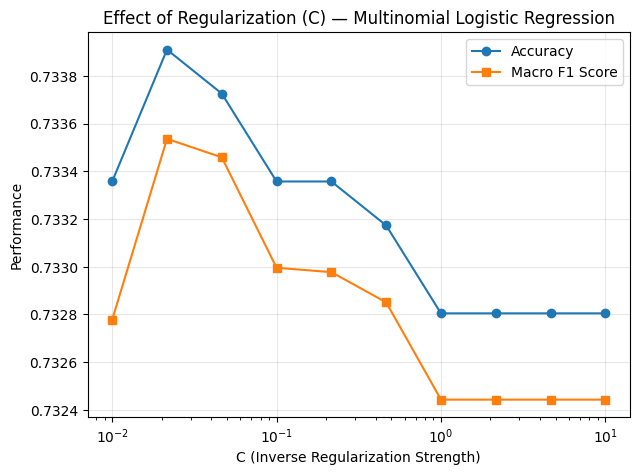

In [23]:
#DO NOT NEED
#MULTINOMIAL
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

# Range of C values to test (smaller C = stronger regularization)
C_values = np.logspace(-2, 1, 10)
acc_scores, f1_scores = [], []

for C in C_values:
    temp_model = LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        penalty="l2",
        C=C,
        max_iter=300,
        random_state=80
    )
    temp_model.fit(X_train_scaled, y_train)
    y_pred = temp_model.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average="macro"))

plt.figure(figsize=(7,5))
plt.plot(C_values, acc_scores, marker='o', label='Accuracy')
plt.plot(C_values, f1_scores, marker='s', label='Macro F1 Score')
plt.xscale('log')
plt.xlabel("C (Inverse Regularization Strength)")
plt.ylabel("Performance")
plt.title("Effect of Regularization (C) — Multinomial Logistic Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


the multinomial logistic regression generalizes well and is not sensitive to small hyperparameter changes.

## **NEW CODE FOR AUC**

In [24]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# ---- 0) Identify county/group column ----
county_id_col = next((c for c in [
    "county_fips","FIPS","fips","County_FIPS",
    "County","county","County_Name","county_name"
] if c in df.columns), None)
assert county_id_col is not None, "Couldn't find a county ID column. Set `county_id_col` to the right column name."

# ---- 1) Features/target ----
# Use the same feature list you trained with:
features = [
    "Median_Income","Median_Age","Poverty_Pct","HS_Grad_Pct","Bachelors_Pct",
    "Unemployed_Pct","Pct_White_Alone","Pct_Black_Alone","Pct_Asian_Alone",
    "Pct_Hispanic","Pct_Other"
]
X = df[features].copy()
y = df["Obesity_Category"].copy()  # Low / Medium / High
groups = df[county_id_col].values

# Encode y for sklearn metrics that need numeric labels (we’ll still keep class names)
le = LabelEncoder()
y_enc = le.fit_transform(y)  # {Low, Medium, High} -> {0,1,2}

# ---- 2) Group (county) split to avoid leakage ----
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=80)
train_idx, test_idx = next(gss.split(X, y_enc, groups=groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y_enc[train_idx], y_enc[test_idx]

# ---- 3) Scale on train only ----
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# ---- 4) Train multinomial logistic regression ----
logit_multi = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    penalty="l2",
    C=0.1,            # moderate regularization; adjust if you like
    max_iter=300,
    random_state=80
)
logit_multi.fit(X_train_s, y_train)

# ---- 5) Predict class probabilities (needed for AUC & ranking) ----
proba_test = logit_multi.predict_proba(X_test_s)  # shape: [n_samples, 3]
class_names = list(le.classes_)                   # e.g., ["High","Low","Medium"] depending on original order


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
# AUC (One-vs-Rest) macro & micro — threshold-free ranking metric
auc_ovr_macro = roc_auc_score(y_test, proba_test, multi_class="ovr", average="macro")
auc_ovr_micro = roc_auc_score(y_test, proba_test, multi_class="ovr", average="micro")

# Per-class AUCs (OvR) to see which class ranks best
per_class_aucs = {}
for k, cname in enumerate(class_names):
    # Binary ground-truth for class k vs rest
    y_true_k = (y_test == k).astype(int)
    y_score_k = proba_test[:, k]
    per_class_aucs[cname] = roc_auc_score(y_true_k, y_score_k)

print(f"Multiclass ROC-AUC (OvR, macro): {auc_ovr_macro:.3f}")
print(f"Multiclass ROC-AUC (OvR, micro): {auc_ovr_micro:.3f}")
print("Per-class AUC (OvR):", {k: round(v,3) for k,v in per_class_aucs.items()})


Multiclass ROC-AUC (OvR, macro): 0.907
Multiclass ROC-AUC (OvR, micro): 0.917
Per-class AUC (OvR): {'High': np.float64(0.962), 'Low': np.float64(0.934), 'Medium': np.float64(0.825)}


In [26]:
# Choose the "High" class index
try:
    high_idx = class_names.index("High")
except ValueError:
    # If your label names differ, set high_idx manually (0/1/2)
    high_idx = 0

y_test_labels = le.inverse_transform(y_test)  # back to strings for readability
high_scores = proba_test[:, high_idx]

# Rank counties by predicted "High" probability (descending)
rank_idx = np.argsort(-high_scores)
y_ranked = y_test_labels[rank_idx]
scores_ranked = high_scores[rank_idx]

# Helper: top-k capture of true Highs
def top_k_capture(y_ranked, label="High", frac=0.10):
    k = max(1, int(len(y_ranked) * frac))
    top_k = y_ranked[:k]
    return (top_k == label).mean(), k

for frac in [0.05, 0.10, 0.20]:
    capture_rate, k = top_k_capture(y_ranked, label="High", frac=frac)
    print(f"Top {int(frac*100)}% (k={k}) capture rate of true 'High': {capture_rate:.3f}")

# Optional: decile lift table (what share of actual Highs fall in each probability decile)
deciles = pd.qcut(scores_ranked, q=10, labels=False, duplicates="drop")
decile_df = pd.DataFrame({
    "decile": deciles,
    "is_high": (y_ranked == "High").astype(int)
})
lift_table = decile_df.groupby("decile")["is_high"].agg(["mean","count"]).sort_index(ascending=False)
lift_table.rename(columns={"mean":"pct_high_in_bin","count":"n"}, inplace=True)
print("\nDecile lift (highest probs at top):\n", lift_table)


Top 5% (k=363) capture rate of true 'High': 1.000
Top 10% (k=727) capture rate of true 'High': 0.996
Top 20% (k=1455) capture rate of true 'High': 0.973

Decile lift (highest probs at top):
         pct_high_in_bin    n
decile                      
9              0.995879  728
8              0.949176  728
7              0.728022  728
6              0.407967  728
5              0.191197  727
4              0.089286  728
3              0.015110  728
2              0.001374  728
1              0.002747  728
0              0.000000  728


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

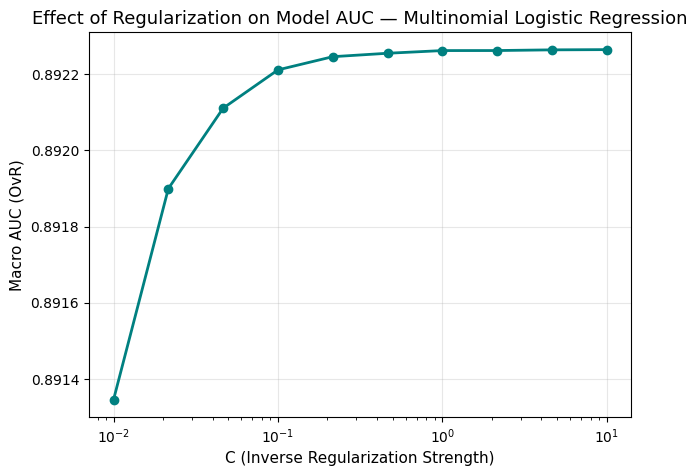

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Encode y if needed (Low/Medium/High → 0/1/2)
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Split (80/20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=80
)

# Scale
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Range of C values (inverse regularization)
C_values = np.logspace(-2, 1, 10)
auc_scores = []

for C in C_values:
    model = LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        penalty="l2",
        C=C,
        max_iter=300,
        random_state=80
    )
    model.fit(X_train_s, y_train)
    y_proba = model.predict_proba(X_test_s)
    auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
    auc_scores.append(auc)

# Plot
plt.figure(figsize=(7,5))
plt.plot(C_values, auc_scores, marker='o', color='teal', linewidth=2)
plt.xscale('log')
plt.xlabel("C (Inverse Regularization Strength)", fontsize=11)
plt.ylabel("Macro AUC (OvR)", fontsize=11)
plt.title("Effect of Regularization on Model AUC — Multinomial Logistic Regression", fontsize=13)
plt.grid(True, alpha=0.3)
plt.show()


In [2]:
_ = total_tracker.stop()
total_data = total_tracker.final_emissions_data


print("\n=== Prediction (per 1,000,000 examples) ===")
print(f"Energy consumed: {total_data.energy_consumed:.6f} kWh")
print(f"CO2 emissions:  {total_data.emissions:.6f} kg CO2eq")




=== Prediction (per 1,000,000 examples) ===
Energy consumed: 0.000687 kWh
CO2 emissions:  0.000311 kg CO2eq
